In [8]:
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
dataset = pd.read_csv('heart_cleveland_upload.csv')

In [10]:
dataset.head(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,60,0,2,120,178,1,0,96,0,0.0,0,0,0,0
96,59,1,2,126,218,1,0,134,0,2.2,1,1,1,1
97,59,1,2,150,212,1,0,157,0,1.6,0,0,0,0
98,58,1,2,112,230,0,2,165,0,2.5,1,1,2,1


In [11]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos colesterol ')

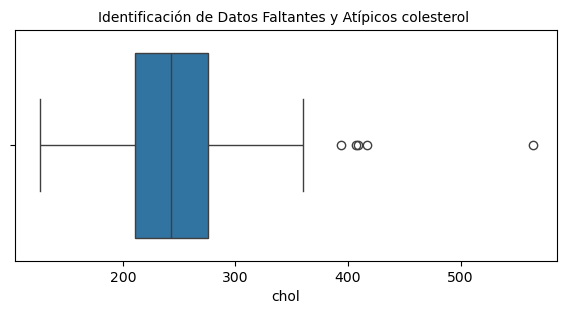

In [12]:
plt.figure(figsize=(7, 3))
sns.boxplot(x=dataset['chol'])
plt.title('Identificación de Datos Faltantes y Atípicos colesterol ', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos ')

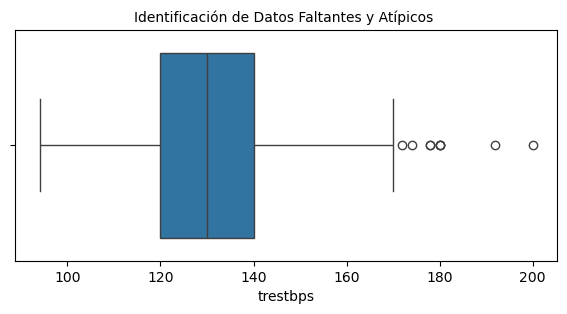

In [13]:
plt.figure(figsize=(7, 3))
sns.boxplot(x=dataset['trestbps'])
plt.title('Identificación de Datos Faltantes y Atípicos ', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos ')

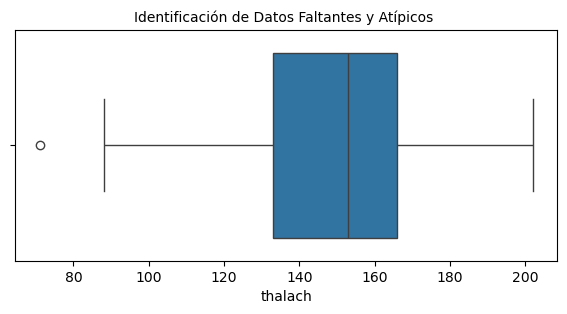

In [14]:
plt.figure(figsize=(7, 3))
sns.boxplot(x=dataset['thalach'])
plt.title('Identificación de Datos Faltantes y Atípicos ', fontsize=10 )

In [15]:
#Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

print("Cantidad de Registros con cero en age: ",dataset['age'].isin([0]).sum())
print("Cantidad de Registros con cero en trestbps: ",dataset['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en chol: ",dataset['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en thalach: ",dataset['thalach'].isin([0]).sum())
print("Cantidad de Registros con cero en oldpeak: ",dataset['oldpeak'].isin([0]).sum()) 

Cantidad de Registros con cero en age:  0
Cantidad de Registros con cero en trestbps:  0
Cantidad de Registros con cero en chol:  0
Cantidad de Registros con cero en thalach:  0
Cantidad de Registros con cero en oldpeak:  96


In [17]:
dataset['oldpeak']=dataset['oldpeak'].replace(0,dataset['oldpeak'].mean())


In [18]:
print("Cantidad de Registros con cero en oldpeak: ",dataset['oldpeak'].isin([0]).sum())

Cantidad de Registros con cero en oldpeak:  0


In [19]:
nivel_minimo=50
nivel_maximo=370
Total_Atipicos=((dataset['chol']<nivel_minimo)|(dataset['chol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 5


In [20]:
dataset=dataset[(dataset['chol']<nivel_maximo)&(dataset['chol']>nivel_minimo)]

In [21]:
Total_Atipicos=((dataset['chol']<nivel_minimo)|(dataset['chol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [22]:
nivel_minimo=80
nivel_maximo=170
Total_Atipicos=((dataset['trestbps']<nivel_minimo)|(dataset['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 9


In [23]:
dataset=dataset[(dataset['trestbps']<nivel_maximo)&(dataset['trestbps']>nivel_minimo)]

In [24]:
Total_Atipicos=((dataset['trestbps']<nivel_minimo)|(dataset['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        279 non-null    int64  
 1   sex        279 non-null    int64  
 2   cp         279 non-null    int64  
 3   trestbps   279 non-null    int64  
 4   chol       279 non-null    int64  
 5   fbs        279 non-null    int64  
 6   restecg    279 non-null    int64  
 7   thalach    279 non-null    int64  
 8   exang      279 non-null    int64  
 9   oldpeak    279 non-null    float64
 10  slope      279 non-null    int64  
 11  ca         279 non-null    int64  
 12  thal       279 non-null    int64  
 13  condition  279 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.7 KB


Característica de interes:

Condition: Si la persona tiene enfermedad cardiaca o no (0 = no tiene enfermedad cardiaca - 1 = si tiene enfermedad cardiaca)</h7>tes

In [26]:
#entrenar el modelo utilizando selección de características
dataset['condition'].value_counts()

condition
0    153
1    126
Name: count, dtype: int64

In [27]:
dataset[['condition']].head(40)

,condition
0,0
1,0
2,0
3,1
4,0
6,0
7,1
8,0
11,1
12,1


In [27]:
#Dividir el dataset en Train y Test para evaluar correctamente el modelo
X = dataset.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna condition
Y = dataset['condition'] # Se cargan los datos de train con los datos de la la columna condition

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [28]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang   oldpeak  \
21    38    1   0       120   231    0        0      182      1  3.800000   
56    45    0   1       130   234    0        2      175      0  0.600000   
203   60    1   3       117   230    1        0      160      1  1.400000   
150   39    0   2       138   220    0        0      152      0  1.055556   
126   50    1   2       140   233    0        0      163      0  0.600000   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...       ...   
82    66    0   2       146   278    0        2      152      0  1.055556   
19    42    1   0       148   244    0        2      178      0  0.800000   
99    58    1   2       105   240    0        2      154      1  0.600000   
12    59    1   0       134   204    0        0      162      0  0.800000   
217   58    1   3       146   218    0        0      105      0  2.000000   

     slope  ca  thal  
21       1   0     2  
56       1   0     0  
203   

In [29]:
print (Y_train)

21     1
56     0
203    1
150    0
126    1
      ..
82     0
19     0
99     0
12     1
217    1
Name: condition, Length: 209, dtype: int64


In [30]:
# Entrenar el modelo
#modelo de regresion logistica
modelo_regresion = LogisticRegression(solver = "liblinear") 
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) 

In [31]:
print (Y_test)

197    1
87     1
192    1
48     0
122    0
      ..
52     1
157    1
106    1
96     1
210    1
Name: condition, Length: 70, dtype: int64


In [32]:
print (Prediccion)

[1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1]


In [33]:
#Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        38
           1       0.93      0.81      0.87        32

    accuracy                           0.89        70
   macro avg       0.89      0.88      0.88        70
weighted avg       0.89      0.89      0.88        70



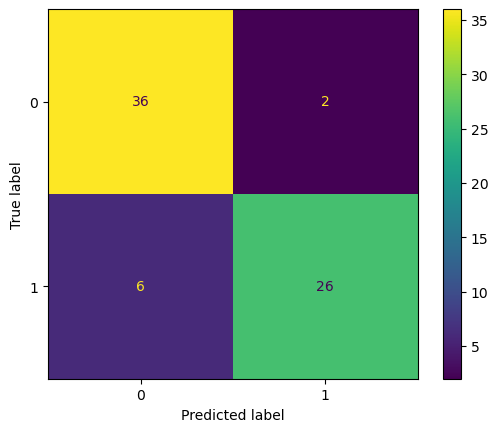

In [35]:
#diferentes gráficas que permitan visualizar los resultados del modelo
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

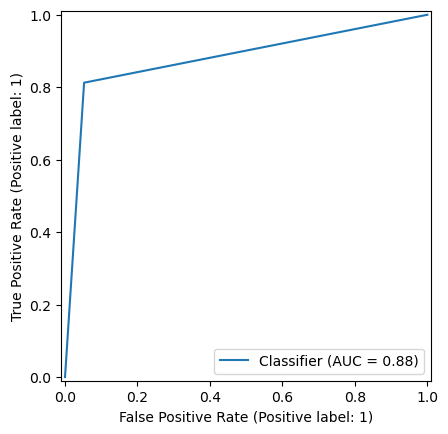

In [36]:
#curva de precisión 
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()